In [4]:
# IM Nice 2023 Analysis - 9/16/24

# At this point I have extracted the data and have it in a CSV file.
# I will now read the data and start to analyze it.


In [5]:
# pip install requests beautifulsoup4 pandas


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from math import radians, cos, sin, asin, sqrt
import json
import os
from pandas import DataFrame, Series

import numpy as np


In [7]:
# Load the data from the CSV file
im_data = pd.read_csv("im_nice_2023_results_raw.csv")

# Display the first few rows of the DataFrame
im_data.head()


,Bib,Name,Country,Gender,Division,Division Rank,Overall Time,Overall Rank,Swim Time,Swim Rank,Bike Time,Bike Rank,Run Time,Run Rank,Finish Status
0,1468,Oscar Malva,Sweden,Male,M40-44,99999,99999,99999,99999,99999,99999,99999,99999,99999,DNS
1,457,David Yerushalmi,United States,Male,M65-69,99999,99999,99999,99999,99999,99999,99999,99999,99999,DNS
2,1442,Pabitra Kumar Das,Bangladesh,Male,M40-44,99999,99999,99999,5455,1940,99999,99999,99999,99999,DNF
3,1593,Luiz Henrique De Faria Leite,Brazil,Male,M50-54,99999,99999,99999,99999,99999,99999,99999,99999,99999,DNS
4,1008,Clyde Floyd,United States,Male,M60-64,99999,99999,99999,5640,1993,99999,99999,99999,99999,DNF


In [8]:
# Check the data types of each column
im_data.dtypes


Bib               int64
Name             object
Country          object
Gender           object
Division         object
Division Rank     int64
Overall Time      int64
Overall Rank      int64
Swim Time         int64
Swim Rank         int64
Bike Time         int64
Bike Rank         int64
Run Time          int64
Run Rank          int64
Finish Status    object
dtype: object

In [9]:
# Check for missing values in the DataFrame
im_data.isnull().sum()


Bib              0
Name             0
Country          0
Gender           0
Division         0
Division Rank    0
Overall Time     0
Overall Rank     0
Swim Time        0
Swim Rank        0
Bike Time        0
Bike Rank        0
Run Time         0
Run Rank         0
Finish Status    0
dtype: int64

In [10]:
# Check for duplicate rows in the DataFrame
im_data.duplicated().sum()


0

In [11]:
# Drop duplicate rows from the DataFrame
im_data.drop_duplicates(inplace=True)

# Check the shape of the DataFrame after dropping duplicates
im_data.shape


(2255, 15)

In [12]:
# Check the unique values in the "Finish Status" column
im_data["Finish Status"].unique()

# DNF = Did Not Finish
# DNS = Did Not Start
# NC = No Card or Not Classified
# DQ = Disqualified
# FIN = Finished


array(['DNS', 'DNF', 'FIN'], dtype=object)

In [31]:
# Let's look at just people who finished the race.
# We can do this in 2 ways: the query method, or boolean indexing.

# Query method
# Assuming im_data is your DataFrame
filtered_df = im_data.query("`Finish Status` == 'FIN'")

# Display the filtered DataFrame
filtered_df


,Bib,Name,Country,Gender,Division,Division Rank,Overall Time,Overall Rank,Swim Time,Swim Rank,Bike Time,Bike Rank,Run Time,Run Rank,Finish Status
253,3,Sam Laidlow,France,Male,MPRO,99999,29182,1,2870,5,16288,1,9706,7,FIN
254,2,Patrick Lange,Germany,Male,MPRO,99999,29417,2,2941,15,17004,10,9161,2,FIN
255,7,Magnus Ditlev,Denmark,Male,MPRO,99999,29503,3,2954,22,16554,2,9667,6,FIN
256,11,Rodolphe Von Berg,United States,Male,MPRO,99999,29577,4,2870,6,16643,4,9764,8,FIN
257,6,Leon Chevalier,France,Male,MPRO,99999,29707,5,3071,42,16770,5,9566,5,FIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250,475,James Stewart,Canada,Female,M70-74,6,60853,1998,5794,2033,31463,2031,22499,1953,FIN
2251,477,John Reynolds,New Zealand,Male,M70-74,7,60970,1999,5615,1990,28233,1849,24927,1993,FIN
2252,1004,Stephen Gamble,Australia,Male,M60-64,113,61021,2000,6112,2095,31572,2035,21965,1934,FIN
2253,2104,Privacy_Request_1391795 Privacy_Request_1391795,Philippines,Male,M45-49,288,61141,2001,5805,2039,31615,2039,22450,1952,FIN


In [32]:
# Or can use boolean indexing

# Assuming im_data is your DataFrame
filtered_df = im_data[im_data['Finish Status'] == 'FIN']

# Display the filtered DataFrame
filtered_df


,Bib,Name,Country,Gender,Division,Division Rank,Overall Time,Overall Rank,Swim Time,Swim Rank,Bike Time,Bike Rank,Run Time,Run Rank,Finish Status
253,3,Sam Laidlow,France,Male,MPRO,99999,29182,1,2870,5,16288,1,9706,7,FIN
254,2,Patrick Lange,Germany,Male,MPRO,99999,29417,2,2941,15,17004,10,9161,2,FIN
255,7,Magnus Ditlev,Denmark,Male,MPRO,99999,29503,3,2954,22,16554,2,9667,6,FIN
256,11,Rodolphe Von Berg,United States,Male,MPRO,99999,29577,4,2870,6,16643,4,9764,8,FIN
257,6,Leon Chevalier,France,Male,MPRO,99999,29707,5,3071,42,16770,5,9566,5,FIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250,475,James Stewart,Canada,Female,M70-74,6,60853,1998,5794,2033,31463,2031,22499,1953,FIN
2251,477,John Reynolds,New Zealand,Male,M70-74,7,60970,1999,5615,1990,28233,1849,24927,1993,FIN
2252,1004,Stephen Gamble,Australia,Male,M60-64,113,61021,2000,6112,2095,31572,2035,21965,1934,FIN
2253,2104,Privacy_Request_1391795 Privacy_Request_1391795,Philippines,Male,M45-49,288,61141,2001,5805,2039,31615,2039,22450,1952,FIN


In [33]:
# What percentage of people finished their Ironman?

len(filtered_df) / len(im_data) * 100


88.78048780487805

In [34]:
# # Convert 'time_in_seconds' to a timestamp (timedelta format)
# filtered_df['Overall Time'] = pd.to_timedelta(filtered_df['Overall Time'], unit='s')

# filtered_df.head()


### Maybe I don't want to do this. I want to keep the time in seconds for now.


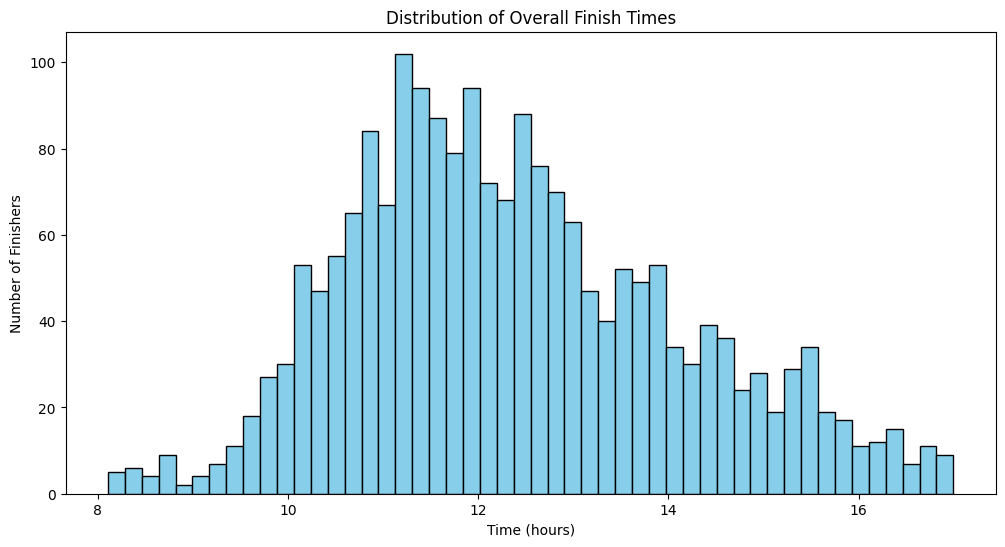

,Bib,Name,Country,Gender,Division,Division Rank,Overall Time,Overall Rank,Swim Time,Swim Rank,Bike Time,Bike Rank,Run Time,Run Rank,Finish Status
253,3,Sam Laidlow,France,Male,MPRO,99999,29182,1,2870,5,16288,1,9706,7,FIN
254,2,Patrick Lange,Germany,Male,MPRO,99999,29417,2,2941,15,17004,10,9161,2,FIN
255,7,Magnus Ditlev,Denmark,Male,MPRO,99999,29503,3,2954,22,16554,2,9667,6,FIN
256,11,Rodolphe Von Berg,United States,Male,MPRO,99999,29577,4,2870,6,16643,4,9764,8,FIN
257,6,Leon Chevalier,France,Male,MPRO,99999,29707,5,3071,42,16770,5,9566,5,FIN


In [35]:
# Let's look at the distribution of finish times for all finishers in the dataset. 
# Note: I went back and changed to have the 'Overall Time' column be in seconds again.

# Plot a histogram of the overall finish times
plt.figure(figsize=(12, 6))
# plt.hist(filtered_df['Overall Time'].dt.total_seconds() / 3600, bins=50, color='skyblue', edgecolor='black')
plt.hist(filtered_df['Overall Time'] / 3600, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Overall Finish Times')
plt.xlabel('Time (hours)')
plt.ylabel('Number of Finishers')
plt.show()

# Display the DataFrame with the converted time format
filtered_df.head()


In [36]:
# We can assume the data is normally distributed, and calculate the mean and standard deviation.

# Calculate the mean and standard deviation of the finish times
mean_finish_time = filtered_df["Overall Time"].mean()
mean_finish_time = pd.to_timedelta(mean_finish_time, unit='s')

std_finish_time = filtered_df["Overall Time"].std()
std_finish_time = pd.to_timedelta(std_finish_time, unit='s')

mean_finish_time, std_finish_time


(Timedelta('0 days 12:22:59.901598402'),
 Timedelta('0 days 01:44:10.503869729'))

In [37]:
# Let's pull some simple statistics from the filtered df.

# Calculate the median finish time
median_finish_time = filtered_df["Overall Time"].median()
median_finish_time = pd.to_timedelta(median_finish_time, unit='s')

# Calculate the fastest finish time
fastest_finish_time = filtered_df["Overall Time"].min()
fastest_finish_time = pd.to_timedelta(fastest_finish_time, unit='s')

# Calculate the slowest finish time
slowest_finish_time = filtered_df["Overall Time"].max()
slowest_finish_time = pd.to_timedelta(slowest_finish_time, unit='s')

median_finish_time, fastest_finish_time, slowest_finish_time


(Timedelta('0 days 12:08:27'),
 Timedelta('0 days 08:06:22'),
 Timedelta('0 days 16:59:48'))

In [38]:
# Let's look at the distribution of finish times for each age group.

# Group the data by 'Age Group' and calculate the mean finish time for each group
age_group_mean_finish_time = filtered_df.groupby('Division')['Overall Time'].mean()
age_group_mean_finish_time = pd.to_timedelta(age_group_mean_finish_time, unit='s')

# Group the data by 'Age Group' and calculate the standard deviation of finish times for each group
age_group_std_finish_time = filtered_df.groupby('Division')['Overall Time'].std()
age_group_std_finish_time = pd.to_timedelta(age_group_std_finish_time, unit='s')

# Display the mean and standard deviation of finish times for each age group
age_group_mean_finish_time, age_group_std_finish_time

(Division
 M18-24   0 days 11:42:02.328358209
 M25-29      0 days 11:17:08.664000
 M30-34   0 days 11:32:45.390134529
 M35-39   0 days 11:41:38.041044776
 M40-44      0 days 12:07:51.950000
                     ...           
 M75-79             0 days 14:57:40
 MGUIDE             0 days 16:51:23
 MHC                0 days 09:43:21
 MPC/ID             0 days 14:26:36
 MPRO        0 days 08:46:44.500000
 Name: Overall Time, Length: 16, dtype: timedelta64[ns],
 Division
 M18-24   0 days 01:28:37.782949370
 M25-29   0 days 01:20:01.193705642
 M30-34   0 days 01:20:31.747992438
 M35-39   0 days 01:24:35.108066062
 M40-44   0 days 01:30:01.733685822
                     ...           
 M75-79                         NaT
 MGUIDE                         NaT
 MHC                            NaT
 MPC/ID   0 days 03:24:45.273216335
 MPRO     0 days 00:39:18.693925090
 Name: Overall Time, Length: 16, dtype: timedelta64[ns])

In [39]:
# How many unique countries are represented in the dataset?

# Count the number of unique countries in the 'Country' column
num_unique_countries = filtered_df['Country'].nunique()
num_unique_countries



92

In [40]:
# List of unique countries in the dataset
unique_countries = filtered_df['Country'].unique()
unique_countries


array(['France', 'Germany', 'Denmark', 'United States', 'South Africa',
       'Italy', 'Poland', 'Australia', 'Netherlands', 'New Zealand',
       'Brazil', 'Austria', 'Switzerland', 'China', 'Slovenia',
       'United Kingdom', 'Belgium', 'Kazakhstan', 'Ireland', 'Spain',
       'Unknown', 'Hungary', 'Lithuania', 'Argentina', 'Croatia',
       'Taiwan', 'Japan', 'Ukraine', 'Israel', 'Czechia', 'Sweden',
       'Serbia', 'Puerto Rico', 'Luxembourg', 'Portugal', 'Canada',
       'Latvia', 'Norway', 'Colombia', 'Slovakia', 'Philippines',
       'Turkey', 'Indonesia', 'Finland', 'Cyprus', 'Mexico', 'Chile',
       'Jersey', 'Panama', 'United Arab Emirates', 'Iceland', 'Thailand',
       'Kuwait', 'Peru', 'Costa Rica', 'Hong Kong', 'Armenia', 'Morocco',
       'Romania', 'Kyrgyzstan', 'Bangladesh', 'Monaco', 'Malta', 'Aruba',
       'Bosnia and Herzegovina', 'Uruguay', 'Guatemala', 'Malaysia',
       'Bolivia', 'Republic of North Macedonia', 'Greece', 'Ecuador',
       'India', 'Curaçao',

In [41]:
# Let's see how many times each country appears in the dataset.

country_counts = filtered_df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
country_counts = country_counts.sort_values('Count', ascending=False)

# # Set the display options to show all rows and columns
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# Display the entire dataframe
country_counts


,Country,Count
0,United States,412
1,Germany,220
2,France,197
3,United Kingdom,171
4,Australia,75
...,...,...
69,Nepal,1
68,Zimbabwe,1
66,Latvia,1
65,Vietnam,1


In [42]:
# Dataframe of countries with at least 3 participants.

filtered_countries = country_counts[country_counts['Count'] >= 3]
filtered_df = filtered_df[filtered_df['Country'].isin(filtered_countries['Country'])]
filtered_df


,Bib,Name,Country,Gender,Division,Division Rank,Overall Time,Overall Rank,Swim Time,Swim Rank,Bike Time,Bike Rank,Run Time,Run Rank,Finish Status
253,3,Sam Laidlow,France,Male,MPRO,99999,29182,1,2870,5,16288,1,9706,7,FIN
254,2,Patrick Lange,Germany,Male,MPRO,99999,29417,2,2941,15,17004,10,9161,2,FIN
255,7,Magnus Ditlev,Denmark,Male,MPRO,99999,29503,3,2954,22,16554,2,9667,6,FIN
256,11,Rodolphe Von Berg,United States,Male,MPRO,99999,29577,4,2870,6,16643,4,9764,8,FIN
257,6,Leon Chevalier,France,Male,MPRO,99999,29707,5,3071,42,16770,5,9566,5,FIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250,475,James Stewart,Canada,Female,M70-74,6,60853,1998,5794,2033,31463,2031,22499,1953,FIN
2251,477,John Reynolds,New Zealand,Male,M70-74,7,60970,1999,5615,1990,28233,1849,24927,1993,FIN
2252,1004,Stephen Gamble,Australia,Male,M60-64,113,61021,2000,6112,2095,31572,2035,21965,1934,FIN
2253,2104,Privacy_Request_1391795 Privacy_Request_1391795,Philippines,Male,M45-49,288,61141,2001,5805,2039,31615,2039,22450,1952,FIN


In [44]:
# Dataframe of the top 3 finishers from each country.

top_3_finishers = filtered_df.groupby('Country').head(3)
top_3_finishers


,Bib,Name,Country,Gender,Division,Division Rank,Overall Time,Overall Rank,Swim Time,Swim Rank,Bike Time,Bike Rank,Run Time,Run Rank,Finish Status
253,3,Sam Laidlow,France,Male,MPRO,99999,29182,1,2870,5,16288,1,9706,7,FIN
254,2,Patrick Lange,Germany,Male,MPRO,99999,29417,2,2941,15,17004,10,9161,2,FIN
255,7,Magnus Ditlev,Denmark,Male,MPRO,99999,29503,3,2954,22,16554,2,9667,6,FIN
256,11,Rodolphe Von Berg,United States,Male,MPRO,99999,29577,4,2870,6,16643,4,9764,8,FIN
257,6,Leon Chevalier,France,Male,MPRO,99999,29707,5,3071,42,16770,5,9566,5,FIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,1450,Dong An Chang,Taiwan,Male,M40-44,302,54515,1831,5035,1751,25487,1494,23011,1962,FIN
2086,529,Alexander Fedorov Li,Singapore,Male,M55-59,184,54581,1834,5056,1769,31536,2033,16724,1377,FIN
2138,2089,Hashem Alharbi,United Arab Emirates,Male,M45-49,275,55823,1886,6411,2119,29420,1935,18694,1682,FIN
2173,1848,Jakkarin Jindawat,Thailand,Male,M25-29,123,56727,1921,4297,977,30288,1980,21401,1906,FIN


In [49]:
# Calculate the average finish time for the top 3 finishers from each country.

average_finish_time = top_3_finishers.groupby('Country')['Overall Time'].mean()
average_finish_time = pd.to_timedelta(average_finish_time, unit='s')
average_finish_time_sorted = average_finish_time.sort_values(ascending=True)

pd.set_option('display.max_rows', None)

average_finish_time_sorted

Country
France                 0 days 08:13:21.666666667
United States                    0 days 08:28:23
Germany                0 days 08:33:18.333333333
Denmark                0 days 08:35:46.666666667
Australia                        0 days 08:56:42
Brazil                           0 days 09:06:22
Poland                           0 days 09:10:13
Italy                  0 days 09:21:07.333333333
Austria                          0 days 09:21:29
Netherlands                      0 days 09:22:00
Switzerland            0 days 09:22:44.666666667
New Zealand            0 days 09:26:07.333333333
United Kingdom         0 days 09:27:29.333333333
South Africa           0 days 09:28:21.666666667
China                  0 days 09:34:59.333333333
Belgium                0 days 09:40:09.666666667
Spain                            0 days 09:51:28
Ireland                0 days 10:02:10.666666667
Kazakhstan             0 days 10:06:15.666666667
Japan                  0 days 10:10:30.666666667
Argentina   